**LOADING LIBRARIES TO BE USED**

In [2]:
#import libraries to be used.
import numpy as np  
import pandas as pd
import dateutil
import matplotlib.pyplot as plt

**READING IN THE AUTOLIB DATASET**

In [3]:
#Importing  the Autolib_dataset
url_path = 'http://bit.ly/autolib_dataset'
Autolib_dataset = pd.read_csv(url_path)


**DATA UNDERSTANDING**


In [5]:
##Preview  the Imported Autolib_dataset. 
Autolib_dataset.head(5)

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [6]:
#Generate descriptive statistics for Autolib_dataset.
Autolib_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

In [7]:
#preview of the shape of DataFrame.
#The search for missings is usually one of the first steps in data analysis. 
Autolib_dataset.shape

(5000, 25)

**DATA PREPARATION** 

In [8]:
#check if there are any missing values.
Autolib_dataset.isna().any().any()

True

In [55]:
#The frequency of Missings values.
#At the beginning, the question is whether there are any missings at all and, if so, how many there are.
Autolib_dataset.isna().sum().sum()

9842

In [9]:
#Dropping the unnecessary columns.
#Displayed comment: The column has very few entries 111 and adds no value to our analysis
#Public name:The column adds no value to our analyis
#Address :The column adds no value to our analyis
#Scheduled at: Has very few entries  only 47 in numbers
##Geo point: Since we are not creating maps it adds little value to our analysis.
#Subscription status :Lack of diversity in the column data hence adds little information on the analysis

Autolib_clean=Autolib_dataset.drop(columns=['Displayed comment','Public name','Address','Scheduled at' ,'Geo point','Subscription status' ])
Autolib_clean.shape

(5000, 19)

In [10]:
# dropping duplicate values 
Autolib_clean.drop_duplicates(keep=False,inplace=True) 
Autolib_clean.shape

(5000, 19)

In [11]:
#Create a column for timestamp
Autolib_clean['Timestamp']= pd.to_datetime(Autolib_clean[['year', 'month', 'day', 'hour', 'minute']])
Autolib_Timestamp=Autolib_clean
Autolib_Timestamp.head(5)

,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Postal code,Rental status,Slots,Station type,Status,year,month,day,hour,minute,Timestamp
0,0,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,75015,operational,2,station,ok,2018,4,8,11,43,2018-04-08 11:43:00
1,6,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,75014,operational,0,station,ok,2018,4,6,7,24,2018-04-06 07:24:00
2,3,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,93350,operational,1,station,ok,2018,4,3,20,14,2018-04-03 20:14:00
3,3,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,75013,operational,2,station,ok,2018,4,4,4,37,2018-04-04 04:37:00
4,3,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,75017,operational,3,station,ok,2018,4,8,17,23,2018-04-08 17:23:00


**ANALYSIS**

The most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris.

In [13]:
#To find the most popular hour of pickup we should first determine what are pick ups or drop offs .
#This can only be told by the differences in counts over time in a given station
# Create dataframe with blue car counter data
stationchanges_blue_cars= Autolib_Timestamp.loc[:,['City','ID','Postal code','Bluecar counter','Timestamp','hour']]
stationchanges_blue_cars


,City,ID,Postal code,Bluecar counter,Timestamp,hour
0,Paris,paris-suffren-2,75015,0,2018-04-08 11:43:00,11
1,Paris,paris-raymondlosserand-145,75014,6,2018-04-06 07:24:00,7
2,Le Bourget,lebourget-johnfitzgeraldkennedy-2,93350,3,2018-04-03 20:14:00,20
3,Paris,paris-eugeneoudine-51,75013,3,2018-04-04 04:37:00,4
4,Paris,paris-portedechamperret-6,75017,3,2018-04-08 17:23:00,17
...,...,...,...,...,...,...
4995,Colombes,colombes-menelotte-8,92700,2,2018-04-06 11:26:00,11
4996,Paris,paris-dantzig-37,75015,4,2018-04-04 16:56:00,16
4997,Paris,paris-bac-142,75007,1,2018-04-01 07:01:00,7
4998,Fontenay-Sous-Bois,fontenaysousbois-valdefontenay-2,94120,2,2018-04-04 17:27:00,17


In [17]:
#Sort the stationchanges_blue_cars dataframe using Timestamp column

stationchanges_blue_cars=stationchanges_blue_cars.sort_values(by='Timestamp',ascending=True)
stationchanges_blue_cars

,City,ID,Postal code,Bluecar counter,Timestamp,hour
1046,Paris,paris-monge-112,75005,0,2018-04-01 00:00:00,0
1107,Paris,paris-madeleinetronchet-parking,75008,0,2018-04-01 00:02:00,0
2874,Paris,paris-sebastienmercier-44,75015,0,2018-04-01 00:02:00,0
2059,Paris,paris-mozart-2,75016,1,2018-04-01 00:03:00,0
4453,Paris,paris-neuvesaintpierre-2,75004,0,2018-04-01 00:04:00,0
...,...,...,...,...,...,...
2672,Paris,paris-gerbert-11,75015,2,2018-04-09 23:48:00,23
2552,CrÃ©teil,creteil-denfertrochereau-12,94000,2,2018-04-09 23:48:00,23
4582,Paris,paris-crimee-82,75019,5,2018-04-09 23:56:00,23
3201,Paris,paris-notredamedesvictoires-21,75002,0,2018-04-09 23:58:00,23


In [25]:
#Next Sort the stationchanges_blue_cars dataframe by  Postal code and Respective ID
stationchanges_blue_cars=stationchanges_blue_cars.sort_values(by=['ID','Postal code'],ascending=True)
stationchanges_blue_cars


,City,ID,Postal code,Bluecar counter,Timestamp,hour
1352,Alfortville,alfortville-blanqui-61,94140,0,2018-04-02 19:28:00,19
4528,Alfortville,alfortville-blanqui-61,94140,0,2018-04-04 09:05:00,9
4880,Alfortville,alfortville-blanqui-61,94140,0,2018-04-07 18:40:00,18
1693,Alfortville,alfortville-blanqui-61,94140,0,2018-04-09 09:01:00,9
4424,Alfortville,alfortville-charlesdegaulle-16,94140,2,2018-04-01 00:36:00,0
...,...,...,...,...,...,...
1944,Yerres,yerres-pierrebrossolette-92,91330,0,2018-04-08 19:34:00,19
1975,Yerres,yerres-pierrebrossolette-92,91330,0,2018-04-09 14:43:00,14
614,Yerres,yerres-pierrebrossolette-92,91330,6,2018-04-07 05:40:00,5
1485,Yerres,yerres-pierrebrossolette-92,91330,5,2018-04-07 19:59:00,19


Determine PICKS and DROPS
When the change is negative it means a car left thus a pick
When the change is positivetive it means an arrival thus a drop

In [29]:
#Determine PICKS and DROPS
#When the change is negative it means a car left thus a pick
#When the change is positivetive it means an arrival thus a drop
stationchanges_blue_cars['Change'] = stationchanges_blue_cars['Bluecar counter'].diff()
stationchanges_blue_cars= stationchanges_blue_cars[stationchanges_blue_cars.Change != 0]
stationchanges_blue_cars['Action']=np.where(stationchanges_blue_cars['Change']>0, 'Drop', 'Pick')
stationchanges_blue_cars.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,ID,Postal code,Bluecar counter,Timestamp,hour,Change,Action
1352,Alfortville,alfortville-blanqui-61,94140,0,2018-04-02 19:28:00,19,NaN,Pick
4424,Alfortville,alfortville-charlesdegaulle-16,94140,2,2018-04-01 00:36:00,0,2.0,Drop
1843,Alfortville,alfortville-charlesdegaulle-16,94140,4,2018-04-01 01:36:00,1,2.0,Drop
4986,Alfortville,alfortville-charlesdegaulle-16,94140,3,2018-04-03 04:03:00,4,-1.0,Pick
2677,Alfortville,alfortville-charlesdegaulle-16,94140,4,2018-04-03 22:27:00,22,1.0,Drop
3218,Alfortville,alfortville-charlesdegaulle-16,94140,6,2018-04-04 03:30:00,3,2.0,Drop
1923,Alfortville,alfortville-etiennedolet-174,94140,4,2018-04-06 07:52:00,7,-2.0,Pick
3642,Alfortville,alfortville-etiennedolet-174,94140,1,2018-04-04 09:40:00,9,-3.0,Pick
2724,Alfortville,alfortville-europe-22,94140,0,2018-04-01 15:11:00,15,-1.0,Pick
4744,Alfortville,alfortville-jeanbaptistepreux-17,94140,4,2018-04-07 08:15:00,8,4.0,Drop


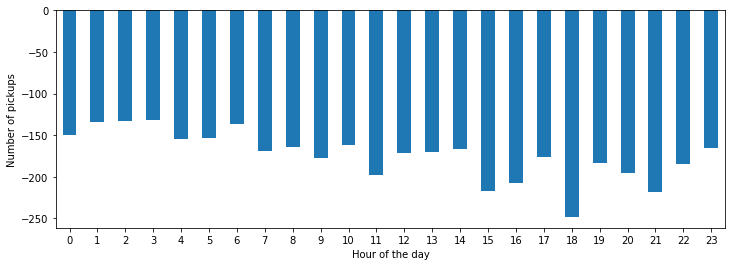

In [31]:
#Now determine the most popular hour of the day for picking.

fig, axs = plt.subplots(figsize=(12, 4))

stationchanges_blue_cars_picks=stationchanges_blue_cars[stationchanges_blue_cars['Change'] < 0]
stationchanges_blue_cars_picks.groupby(stationchanges_blue_cars_picks["hour"])["Change"].sum().plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("Hour of the day");  # custom x label using matplotlib

plt.ylabel("Number of pickups");



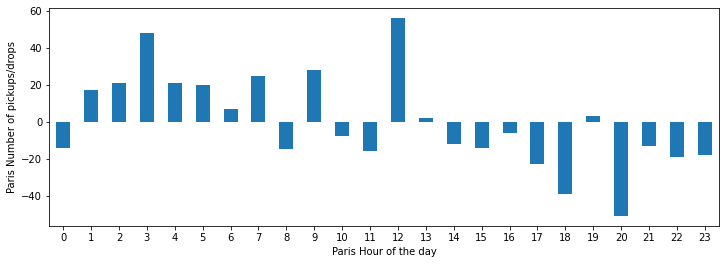

In [41]:
#The most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris.
stationchanges_blue_cars_picks_paris=stationchanges_blue_cars[stationchanges_blue_cars['City'] =='Paris' ]


#Paris_pickups= pd.DataFrame(stationchanges_blue_cars_picks_paris.hour.value_counts().sort_values(ascending=False))
#Paris_pickups
fig, axs = plt.subplots(figsize=(12, 4))
stationchanges_blue_cars_picks_paris.groupby(stationchanges_blue_cars_picks_paris["hour"])["Change"].sum().plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("Paris Hour of the day");  # custom x label using matplotlib

plt.ylabel("Paris Number of pickups/drops");


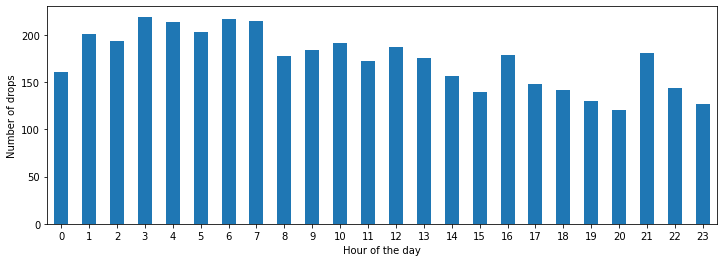

In [32]:
#Now determine the most popular hour of the day for droping.

fig, axs = plt.subplots(figsize=(12, 4))

stationchanges_blue_cars_drops=stationchanges_blue_cars[stationchanges_blue_cars['Change'] > 0]
stationchanges_blue_cars_drops.groupby(stationchanges_blue_cars_drops["hour"])["Change"].sum().plot(kind='bar', rot=0, ax=axs)
 
plt.xlabel("Hour of the day");  # custom x label using matplotlib

plt.ylabel("Number of drops");

In [48]:
#The most popular station

popular_station = stationchanges_blue_cars.groupby([stationchanges_blue_cars['Action'],'City','ID'])["Change"].sum().sort_values(ascending=False)

popular_station= pd.DataFrame(popular_station)
popular_station.head(5)

Change
Action City        ID                               
Drop   Paris       paris-portedemontrouge-8     19.0
                   paris-philippeauguste-126    18.0
                   paris-republique-128         13.0
       Alfortville alfortville-malleret-16      13.0
       Paris       paris-bremontier-19          13.0